In [1]:
M<-read.csv2("Milk09-12.csv", header=FALSE, sep=";", dec = ",", col.names = c("Month","Price1","Price2"))
library(forecast)

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Formula: y ~ f * x + a * sin(1/2 * x + d) + b

Parameters:
  Estimate Std. Error t value Pr(>|t|)    
f  0.26520    0.01085  24.440  < 2e-16 ***
a  0.85643    0.21574   3.970 0.000256 ***
b 18.92168    0.31029  60.982  < 2e-16 ***
d  1.56886    0.25028   6.268 1.25e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.054 on 45 degrees of freedom

Number of iterations to convergence: 10 
Achieved convergence tolerance: 9.998e-07


[1] "MAPE:"


[1] 3.648404

,ME,RMSE,MAE,MPE,MAPE,MASE
Training set,7.251321e-17,1.173279,0.9485848,-0.2639415,3.888522,0.264679


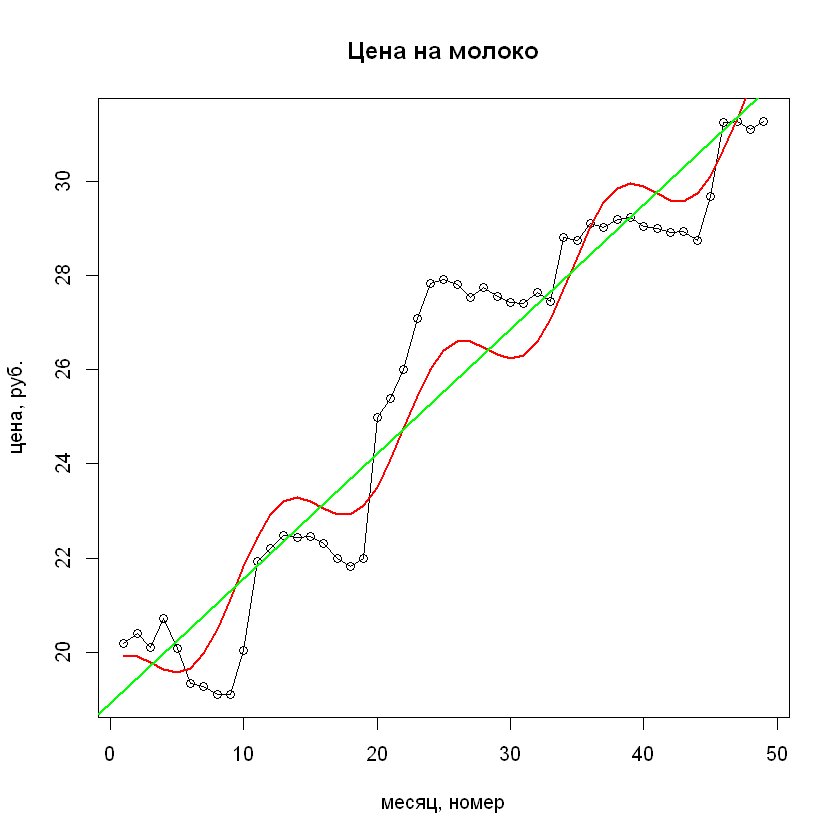

In [9]:
df = data.frame(y = as.vector(M$Price1), x = seq(1, length(M[,1])))
m5 <- nls(y ~ f * x +  a * sin(1/2 * x + d) + b, data = df, start = list(f = 1, a = 1, b = 0, d = 0))
predictions <- predict(m5)
plot(M$Price1, main="Цена на молоко", 
     ylab="цена, руб.", xlab="месяц, номер", type="o")
lines(df$x, predict(m5), col = 'red', lwd = 2)
summary(m5)
print('MAPE:')
sum(abs((fitted(m5) - df$y)/df$y)) * 100 / length(df$y)
linear <- lm(M$Price1 ~ df$x)
abline(linear, col = 'green', lwd = 2)
accuracy(linear)


Call:
lm(formula = M$Price1 ~ df$x)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1858 -0.8482  0.1203  0.7733  2.5548 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.9142     0.3476   54.41   <2e-16 ***
df$x          0.2646     0.0121   21.87   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.198 on 47 degrees of freedom
Multiple R-squared:  0.9105,	Adjusted R-squared:  0.9086 
F-statistic: 478.2 on 1 and 47 DF,  p-value: < 2.2e-16


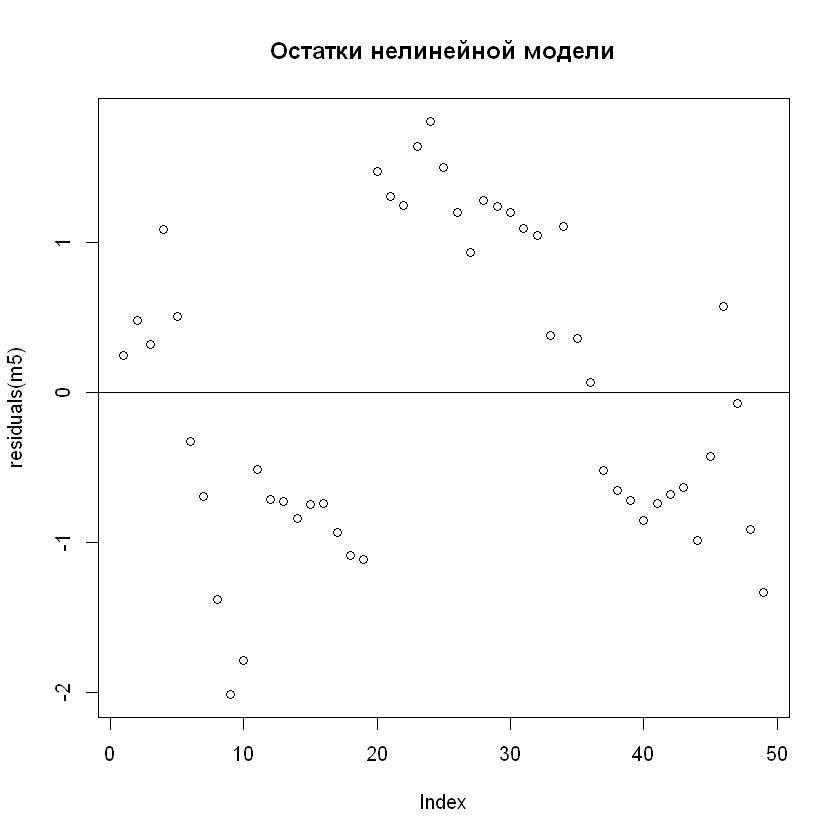

In [3]:
plot(residuals(m5), main = 'Остатки нелинейной модели')
abline(0, 0)
summary(linear)

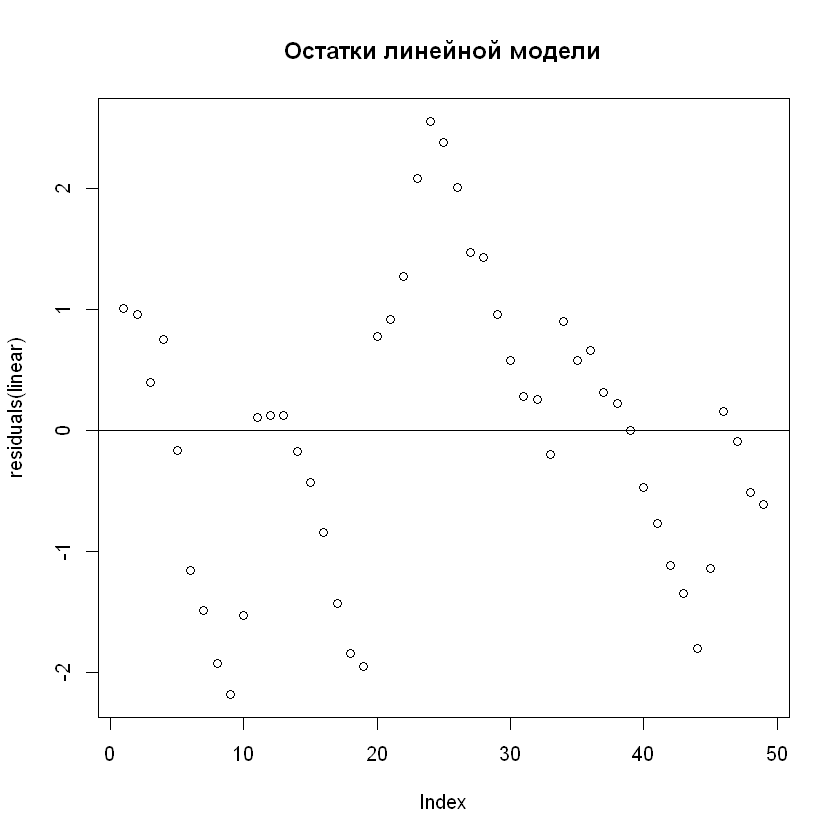

In [4]:
plot(residuals(linear), main = 'Остатки линейной модели')
abline(0, 0)


Formula: y ~ a + exp(x * b)

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 1.734e+01  2.984e-01   58.09   <2e-16 ***
b 7.857e-02  3.889e-04  202.03   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.652 on 47 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 3.97e-07


[1] "MAPE:"


[1] 5.047343

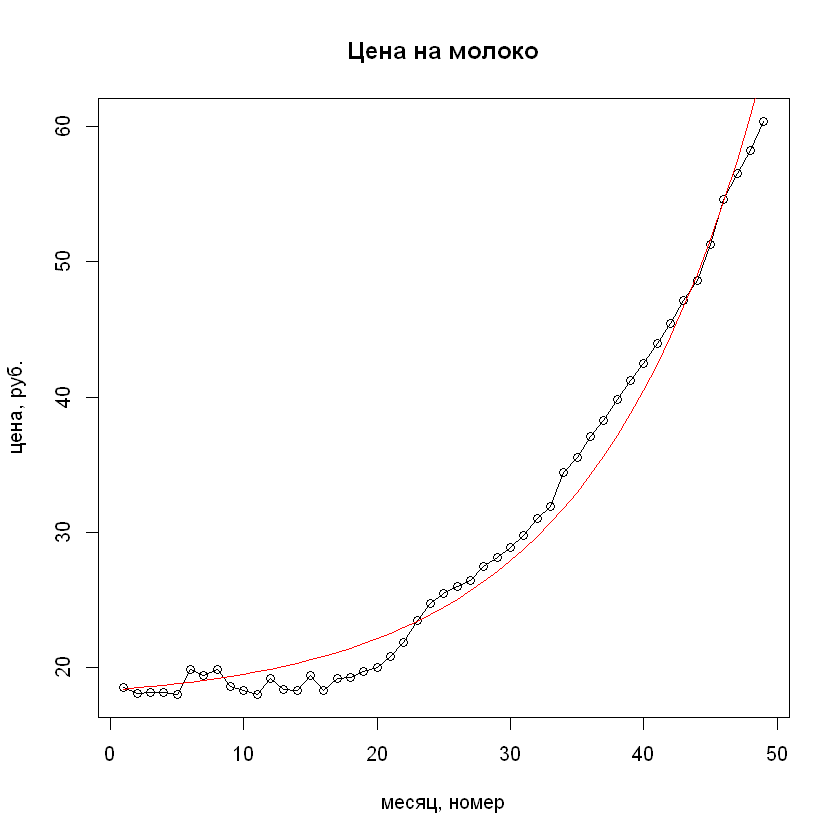

In [5]:
df = data.frame(y = as.vector(M$Price2), x = seq(1, length(M[,1])))
m2 = nls(y ~ a + exp(x * b),
                   start=list(a = 10, b = 0),
                   data = df)
predictions <- predict(m2)
plot(M$Price2, main="Цена на молоко", ylab="цена, руб.", xlab="месяц, номер", type="o")
lines(df$x, predict(m2), col = 'red')
summary(m2)
print('MAPE:')
sum(abs((fitted(m2) - df$y)/df$y)) * 100 / length(df$y)

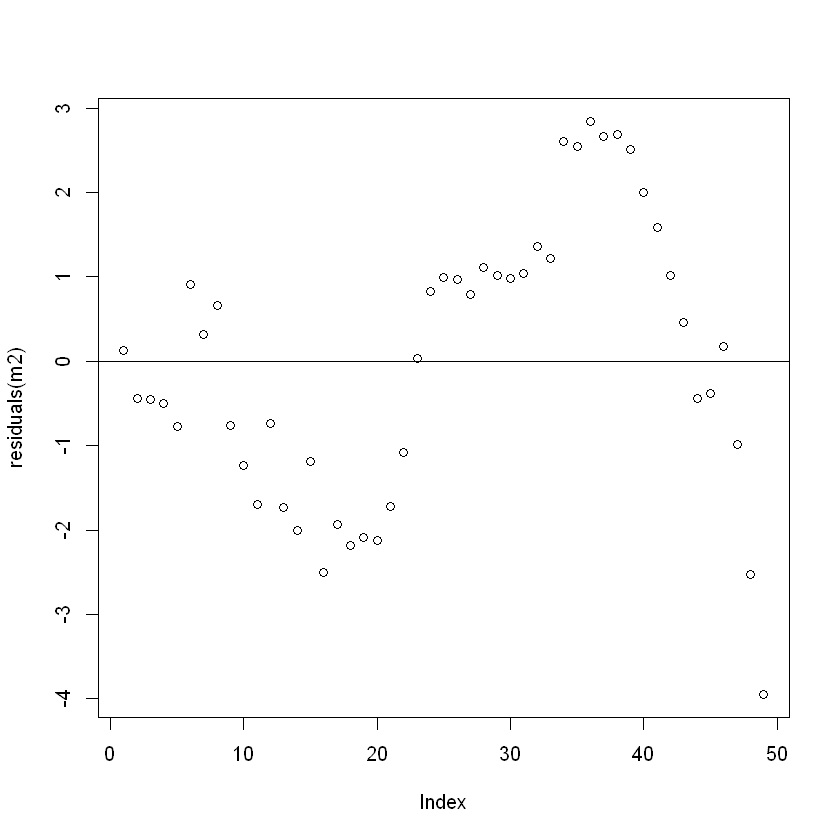

In [6]:
plot(residuals(m2))
abline(0, 0)